# **Analysis of Twitch Social Network**

## **Introduction**

This project focuses on analyzing the social network of Twitch using the dataset provided by SNAP (Stanford Network Analysis Project). Twitch is a live-streaming platform, primarily for gaming, hosting a vast community of streamers and viewers. The Twitch social network is represented as a graph, where nodes are users, and edges represent social connections. This project aims to study the interaction dynamics, community structures, and user behaviors within the network.

---

## **Project Objectives**

### 1. **User Behavior Analysis**
I will examine the interactions between users on the platform by analyzing metrics such as:
- Node degree (number of connections).
- Centrality (relative importance of a node in the network).
- Distribution of connections and identification of influential users.

### 2. **Community Detection**
I will apply community detection algorithms to identify groups of users that are strongly connected. This will help to understand how communities form based on shared characteristics, such as language, preferred games, or geographical location.

### 3. **Explicit Content Analysis**
I will predict the likelihood of a streamer using explicit language based on their connections and attributes. This will be achieved using supervised machine learning techniques, leveraging node attributes and graph connections.

---

## **Methodology**

The project will be developed following these steps:
1. **Data Loading and Preprocessing**: Importing the edge list and node features, building the graph, and cleaning the data.
2. **Exploratory Network Analysis**: Studying the main characteristics of the network, such as the number of nodes, edges, and basic metrics.
3. **Experiments**:
   - User behavior analysis.
   - Community detection using clustering algorithms.
   - Explicit content prediction through classification.
4. **Evaluation**: Evaluating results and visualizing the network and analyses.

---

## **Tools Used**
- **Python**: The primary programming language.
- **NetworkX**: For graph manipulation and analysis.
- **Scikit-learn**: For implementing machine learning models.
- **Matplotlib/Seaborn**: For data and result visualization.
- **Gephi**: For interactive network visualization.


---



## **1. Data Loading and Preprocessing**


In [25]:
import networkx as nx
import pandas as pd
import matplotlib.pyplot as plt

### 1. Load the dataset, including:
   - Edge list: representing user connections on Twitch.
   - Node features: describing user attributes (e.g., language, streaming behavior).

In [9]:
# Load the edge list
edgelist = pd.read_csv('large_twitch_edges.csv', )
# Display the first few rows to understand the structure
edgelist.head()

,numeric_id_1,numeric_id_2
0,98343,141493
1,98343,58736
2,98343,140703
3,98343,151401
4,98343,157118


In [10]:
# Load CSV file with node features
node_features = pd.read_csv("large_twitch_features.csv", index_col=5)
# Display the first few rows to understand the structure
node_features.head()

,views,mature,life_time,created_at,updated_at,dead_account,language,affiliate
numeric_id,,,,,,,,
0,7879,1,969,2016-02-16,2018-10-12,0,EN,1
1,500,0,2699,2011-05-19,2018-10-08,0,EN,0
2,382502,1,3149,2010-02-27,2018-10-12,0,EN,1
3,386,0,1344,2015-01-26,2018-10-01,0,EN,0
4,2486,0,1784,2013-11-22,2018-10-11,0,EN,0


At first sight, I note that:
- **Edge List**: Represents the connections between Twitch users, where each row is a link between two users (`numeric_id_1` and `numeric_id_2`).
- **Node Features**: Contains attributes for each user (node) such as:
  - `views`: Total number of views a streamer has.
  - `mature`: Indicates if the streamer produces mature content (1 for yes, 0 for no).
  - `life_time`: Lifetime of the user's account (in days).
  - `created_at` and `updated_at`: Account creation and last update dates.
  - `dead_account`: Indicates if the account is inactive.
  - `language`: The main language used by the user.
  - `affiliate`: Indicates if the user is a Twitch affiliate (1 for yes, 0 for no).

### 2. Clean and preprocess the data:
   - Handle missing values and duplicates.

In [14]:
# Check for null values and duplicates in the edge list
print("### Edge List ###")
print(f"Total rows in edge list: {edgelist.shape[0]}")

# Check for null values
null_values_edges = edgelist.isnull().sum()
print("Null values in edge list:")
print(null_values_edges)

# Check for duplicates
duplicates_edges = edgelist.duplicated().sum()
print(f"Duplicate rows in edge list: {duplicates_edges}")

print("\n")

# Check for null values and duplicates in the node attributes
print("### Node Attributes ###")
print(f"Total rows in node attributes: {node_features.shape[0]}")

# Check for null values
null_values_nodes = node_features.isnull().sum()
print("Null values in node attributes:")
print(null_values_nodes)

### Edge List ###
Total rows in edge list: 6797557
Null values in edge list:
numeric_id_1    0
numeric_id_2    0
dtype: int64
Duplicate rows in edge list: 0


### Node Attributes ###
Total rows in node attributes: 168114
Null values in node attributes:
views           0
mature          0
life_time       0
created_at      0
updated_at      0
dead_account    0
language        0
affiliate       0
dtype: int64


- **Edge List**:
  - No null values found in `numeric_id_1` or `numeric_id_2`.
  - No duplicate rows detected.

- **Node Attributes**:
  - No null values in any columns (`views`, `mature`, `life_time`, etc.).
  - No duplicate rows detected.

Both datasets are clean and ready for the next step: building the graph using the edge list and enriching it with node attributes.

### 3. Build the graph:
   - Use NetworkX to create the graph from the edge list.
   - Add node features to the graph.

In [15]:
G = nx.from_pandas_edgelist(edgelist, source='numeric_id_1', target='numeric_id_2', create_using=nx.DiGraph())
print(G)
print('Is the graph directed ?',G.is_directed())

DiGraph with 168114 nodes and 6797557 edges
Is the graph directed ? True


I first construct a **directed graph** (`DiGraph`) using the edge list. This preserves the directionality of connections, which is important for tasks like user behavior analysis, where metrics like in-degree and out-degree are crucial.

To apply community detection algorithms (such as Louvain), I will convert the directed graph into an **undirected graph** using `G.to_undirected()`. This step simplifies the graph structure by ignoring the directionality of edges, which is often not required for community detection.


In [22]:
# Add node features to the graph
nx.set_node_attributes(G, node_features.to_dict(orient='index'))

# Check correctness of this operation
example_node = list(G.nodes)[0]
print(f"Attributes for node {example_node}: {G.nodes[example_node]}")

Attributes for node 98343: {'views': 282, 'mature': 0, 'life_time': 2086, 'created_at': '2012-12-27', 'updated_at': '2018-09-13', 'dead_account': 0, 'language': 'EN', 'affiliate': 0}


### 4. Save the cleaned data for later use.

In this section, I will save the Graph in a format compatible with Gephi, for visualisation.

In [23]:
nx.write_graphml(G, "twitch_network.graphml")

### 5. Visualize a small portion of the graph to ensure correctness.

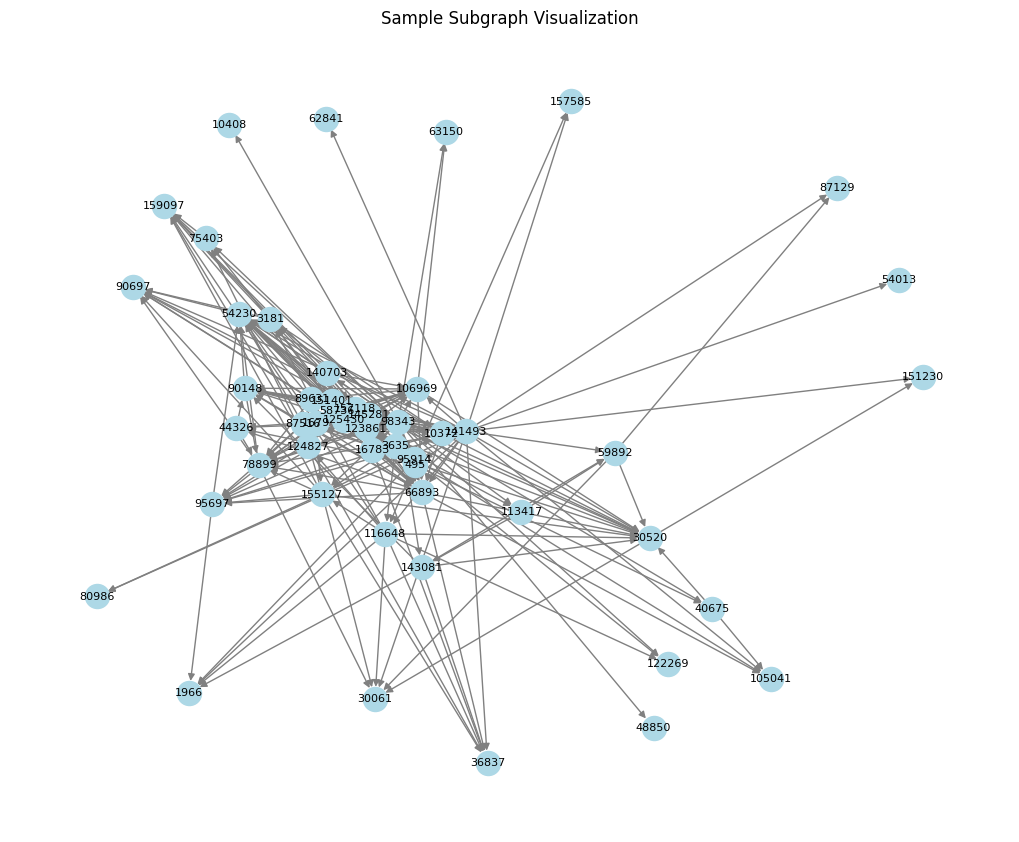

In [32]:
# Selecting 50 nodes and creating subgraph
sample_nodes = list(G.nodes)[:50]
subgraph = G.subgraph(sample_nodes)

# Using spring layout for visualisation
pos = nx.spring_layout(subgraph)

# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw(
    subgraph,
    pos,
    with_labels=True,           # Mostra i label dei nodi
    node_size=300,              # Dimensione dei nodi
    node_color="lightblue",     # Colore dei nodi
    edge_color="gray",          # Colore degli spigoli
    font_size=8                 # Dimensione del testo dei nodi
)
plt.title("Sample Subgraph Visualization")
plt.show()

This visualization represents a small subset of the Twitch network. Each node corresponds to a user, and edges represent directed connections (e.g., follows). 

- The **spring layout** groups highly connected nodes in the center, while less connected nodes are pushed to the edges.
- The graph structure looks consistent, with no obvious disconnected components in this sample.
- This visualization serves as a quick check to ensure that the graph and its connections are correctly constructed.
